<a href="https://colab.research.google.com/github/Sidd-2906/Computer-Vision/blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [1]:
import os

In [2]:
import glob

In [3]:
from IPython.display import Image,display

In [4]:
from IPython import display

In [5]:
display.clear_output()

In [6]:
HOME = os.getcwd()

**Installing ultralytic using pip Install**

In [10]:
!!pip install ultralytics==8.0.0

['Collecting ultralytics==8.0.0',
 '  Downloading ultralytics-8.0.0-py3-none-any.whl (219 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/219.8 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━\x1b\x1b╸\x1b\x1b━━━━━━━━━━━━━━━━━━━\x1b \x1b112.6/219.8 kB\x1b \x1b3.2 MB/s\x1b eta \x1b0:00:01\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b219.8/219.8 kB\x1b \x1b3.9 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hCollecting hydra-core>=1.2.0 (from ultralytics==8.0.0)',
 '  Downloading hydra_core-1.3.2-py3-none-any.whl (154 kB)',
 '\x1b[?25l     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b0.0/154.5 kB\x1b \x1b?\x1b eta \x1b-:--:--\x1b',
 '\x1b[2K     \x1b━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━\x1b \x1b154.5/154.5 kB\x1b \x1b6.9 MB/s\x1b eta \x1b0:00:00\x1b',
 '\x1b[?25hRequirement already satisfied: matplotlib>=3.2.2 in /usr/local/lib/python3.10/dist-packages (from ultralytics==8.0.0) (3.7.1)',
 'Requiremen

**Checking wheather YOLOv8 is Installed and its working Fine**

In [11]:
import ultralytics

In [13]:
ultralytics.checks()

Ultralytics YOLOv8.0.138 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.3/78.2 GB disk)


Importing the nut and bolt images dataset from roboflow

In [14]:
!mkdir {HOME}/datasets

In [15]:
!pwd

/content


In [16]:
%cd {HOME}/datasets

/content/datasets


In [17]:
!pwd

/content/datasets


In [18]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="c77bbUoWfDXuSLNEbBxP")
project = rf.workspace("siddharth-gg0cq").project("nut_and_bolt_detection")
dataset = project.version(2).download("yolov5")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=128b02151ff13f08e5824203f6ba86817aec3fe3246a9df04b16d3c595a5e601
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0
  Attempting uninstall: idna
    Found e

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov5pytorch in progress : 85.0%
Version export complete for yolov5pytorch format


Extracting Dataset Version Zip to nut_and_bolt_detection-2 in yolov5pytorch:: 100%|██████████| 234/234 [00:00<00:00, 895.88it/s]


**Train the YOLOv8 Model on Custom Dataset**

In [19]:
%cd {HOME}

/content


In [20]:
%cd {dataset.location}

/content/datasets/nut_and_bolt_detection-2


In [21]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8n.pt data=/content/datasets/nut_and_bolt_detection/data.yaml epochs=200 imgsz=640

/content
WARNING ⚠️ Different global settings detected, resetting to defaults. This may be due to an ultralytics package update. View and update your global settings directly in /root/.config/Ultralytics/settings.yaml
Error parsing override '/content'
extraneous input '/' expecting {EQUAL, '~', '+', '@', KEY_SPECIAL, DOT_PATH, ID}
See https://hydra.cc/docs/1.2/advanced/override_grammar/basic for details

Set the environment variable HYDRA_FULL_ERROR=1 for a complete stack trace.
100% 6.23M/6.23M [00:00<00:00, 101MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/nut_and_bolt_detection/data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, v

In [22]:
!ls {HOME}//runs/detect/train

args.yaml					    train_batch0.jpg
confusion_matrix.png				    train_batch1330.jpg
events.out.tfevents.1689837062.76d069172d2e.4710.0  train_batch1331.jpg
F1_curve.png					    train_batch1332.jpg
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg
predictions.json				    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg
results.csv					    weights
results.png


**Displaying the Confusion Matrix**

/content


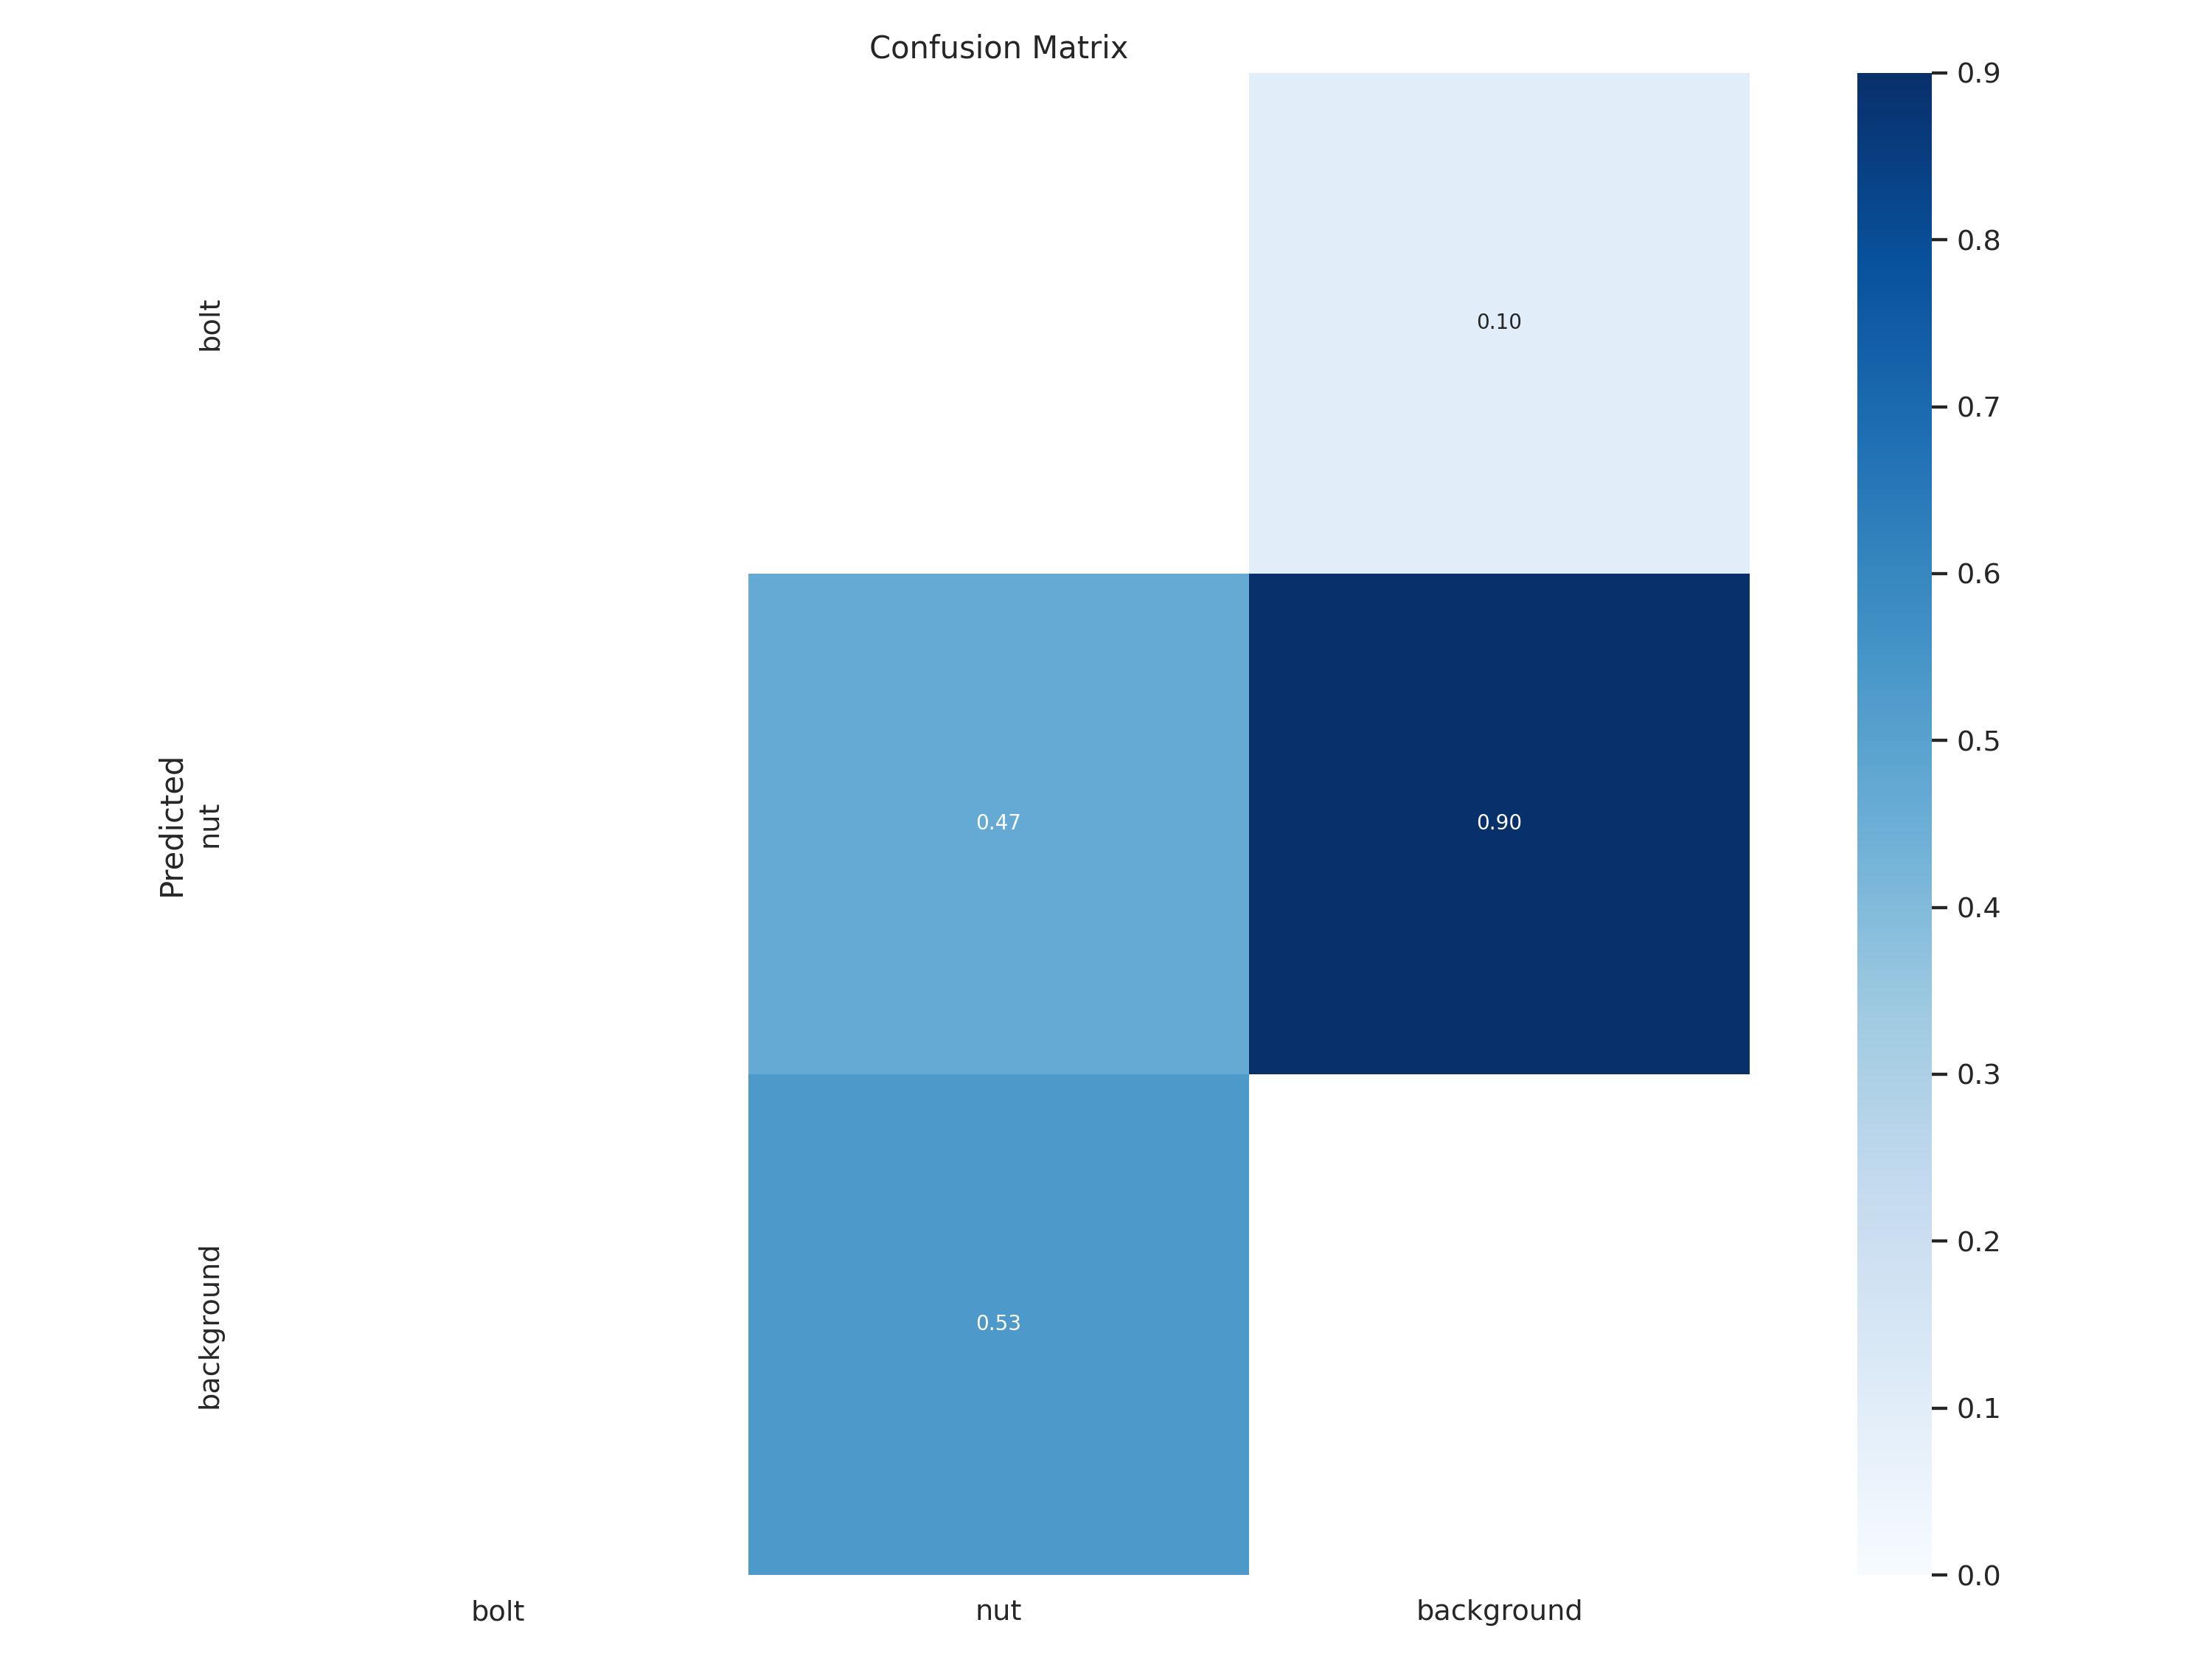

In [24]:
%cd {HOME}
#Image(filename=f'{HOME}/content/runs/detect/train/confusion_matrix.png',width=900)
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png',width = 900)

**Training and Validation loss**

/content


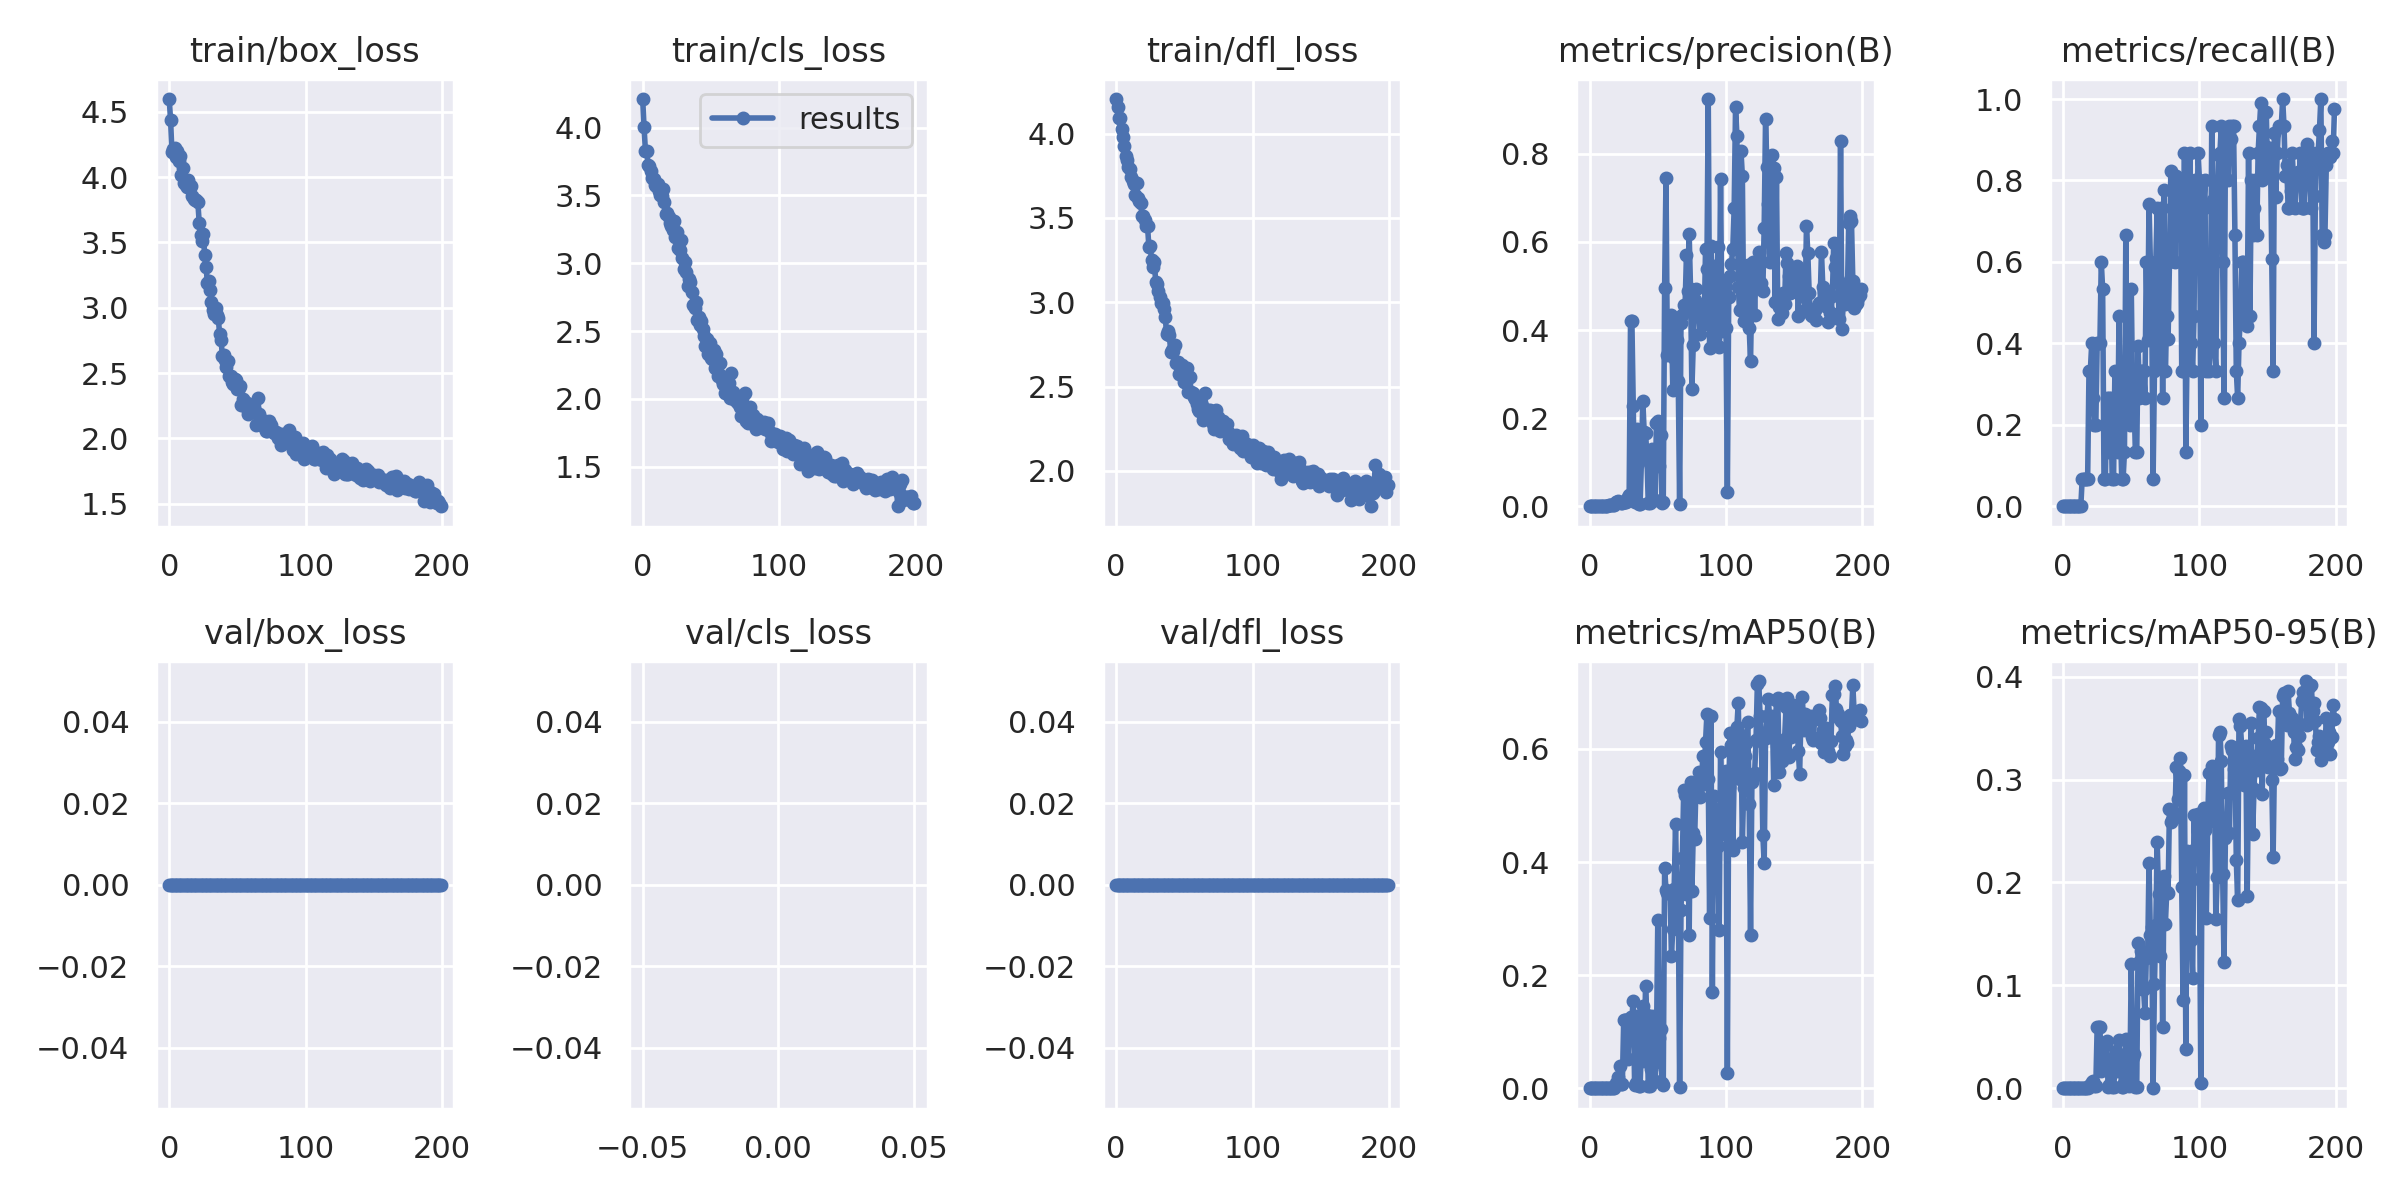

In [25]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png',width=600)

/content


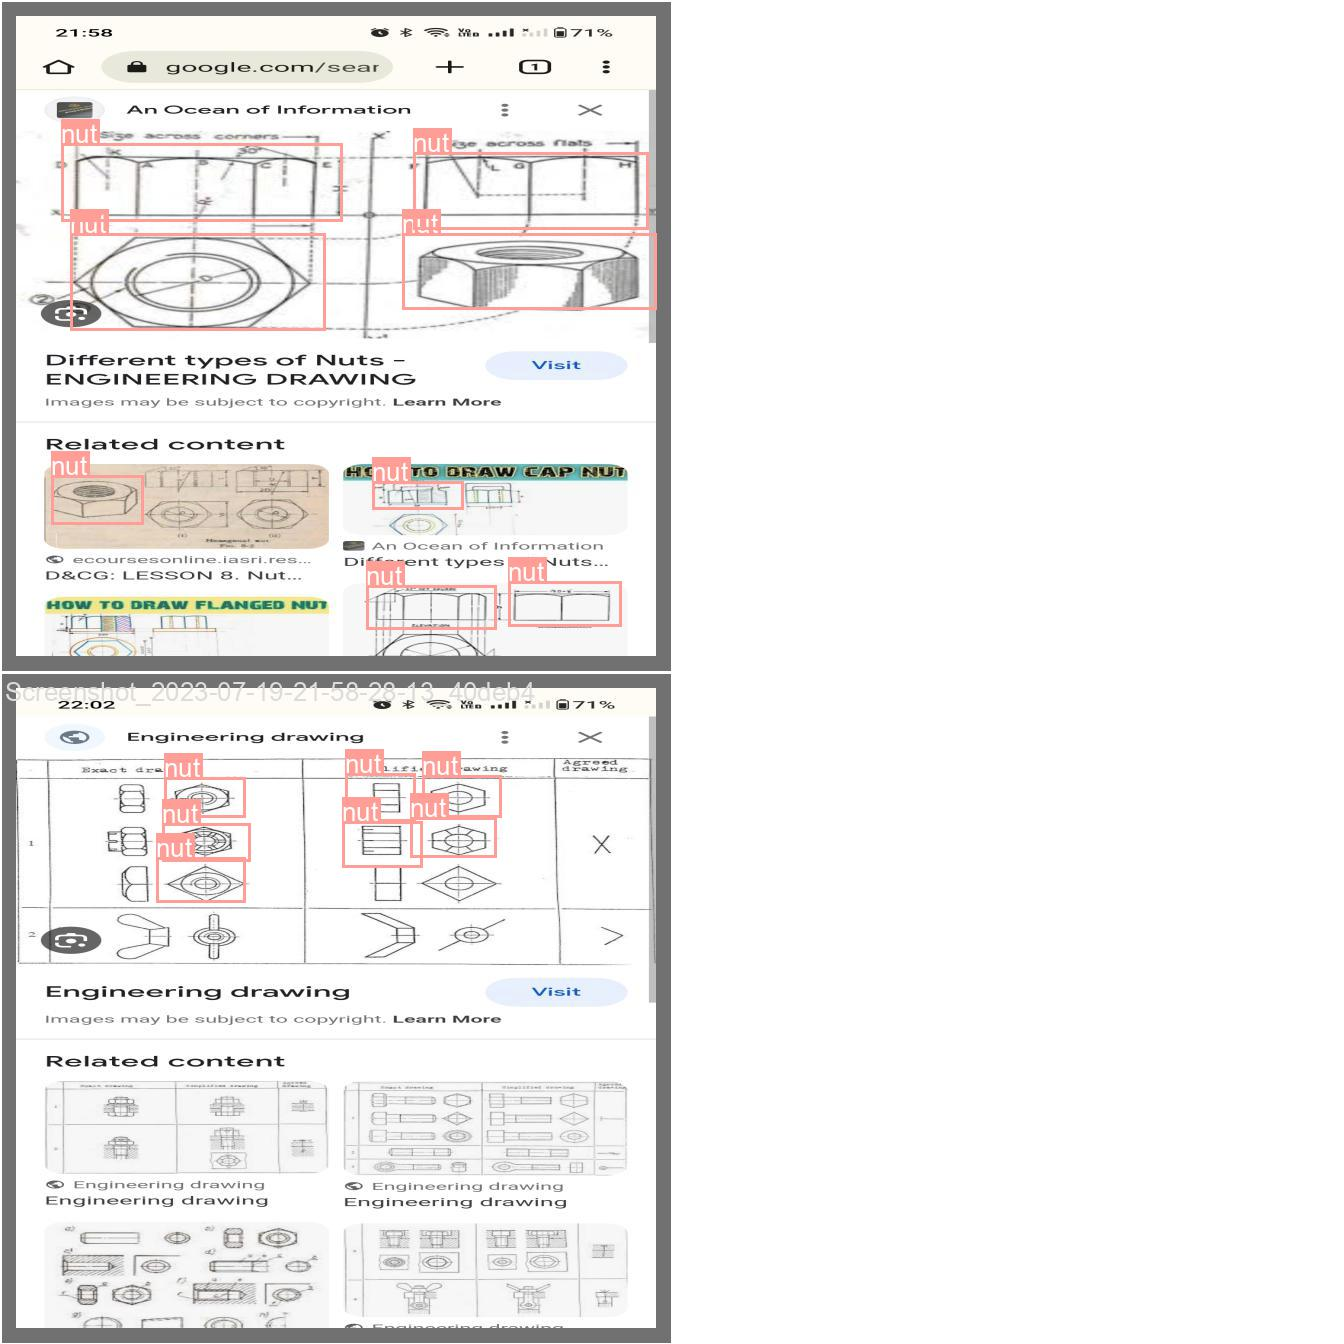

In [27]:
%cd {HOME}
Image(filename=f'/content/runs/detect/train/val_batch0_labels.jpg',width = 600)

**Validate Custom Model**

In [30]:
%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data=/content/datasets/nut_and_bolt_detection/data.yaml

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/nut_and_bolt_detection/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100% 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  3.07it/s]
                   all          2         15      0.476      0.867      0.695      0.396
                   nut          2         15      0.476      0.867      0.695      0.396
Speed: 0.8ms pre-process, 33.2ms inference, 0.0ms loss, 44.4ms post-process per image


**Inference Custom Model**

In [31]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/nut_and_bolt_detection/test/images

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
image 1/4 /content/datasets/nut_and_bolt_detection/test/images/Screenshot_2023-07-19-21-58-07-82_40deb401b9ffe8e1df2f1cc5ba480b12_jpg.rf.4735c54e93ba92f62d4eb1aae7ddecd2.jpg: 640x640 6 bolts, 3 nuts, 7.4ms
image 2/4 /content/datasets/nut_and_bolt_detection/test/images/Screenshot_2023-07-19-21-59-31-34_40deb401b9ffe8e1df2f1cc5ba480b12_jpg.rf.5dd1678e3c6f239f2e29ee1f3e114c79.jpg: 640x640 5 bolts, 6 nuts, 7.4ms
image 3/4 /content/datasets/nut_and_bolt_detection/test/images/Screenshot_2023-07-19-22-01-22-28_40deb401b9ffe8e1df2f1cc5ba480b12_jpg.rf.9b553b40b06b1fd6ebfbe72727fd909d.jpg: 640x640 11 nuts, 7.3ms
image 4/4 /content/datasets/nut_and_bolt_detection/test/images/Screenshot_2023-07-19-22-03-34-97_40deb401b9ffe8e1df2f1cc5ba480b12_jpg.rf.0d374c87f9178c6ae4d6887b1cf8e590.jpg: 640x640 3 bolts, 7 nuts, 7.3ms
S

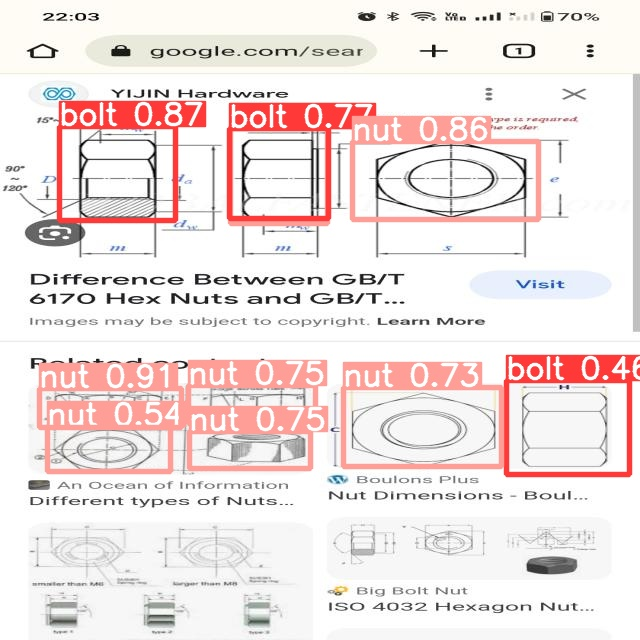

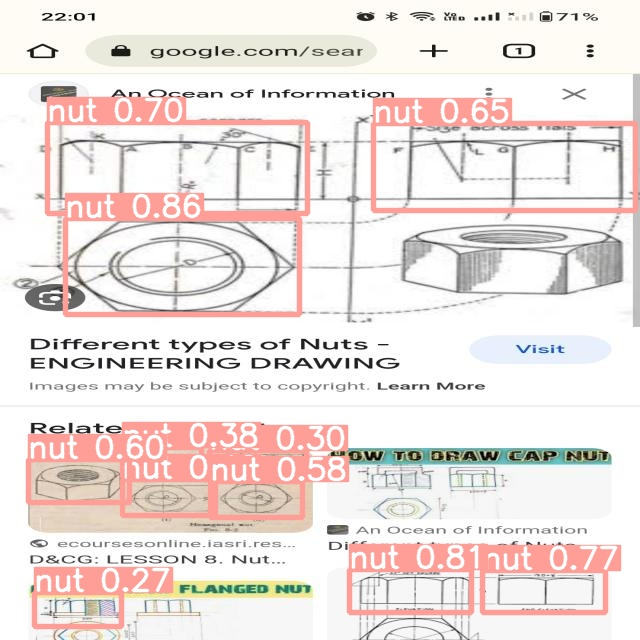

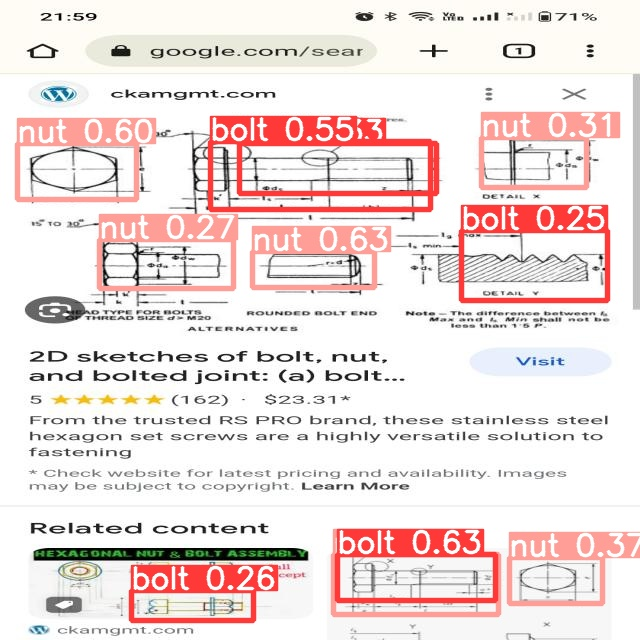

In [32]:
import glob
from IPython.display import Image,display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[1:4]:
    display(Image(filename=image_path, width=600))
    print("\n")